# Lead Conversion Prediction

--------------------------------
## **Context** 
-------------------------------

The EdTech industry has experienced remarkable growth over the past decade. According to a forecast, the global online education market is projected to reach $286.62 billion by 2023, with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The rise of online education has been fueled by several advantages, such as seamless information sharing, personalized learning experiences, and transparent assessment processes. Consequently, online education has become a preferred alternative to traditional learning methods.

The rapid expansion of the online education sector has attracted numerous new customers, leading to the emergence of several new companies in the industry. With the availability of diverse digital marketing resources, these companies can now reach a broader audience to promote their offerings. Potential customers who show interest in these offerings are referred to as leads.

There are various ways in which EdTech companies like ExtraaLearn acquire leads:

* Interaction with marketing content on social media and other online platforms.

* Website or mobile app visits, where users download brochures.

* Communication via email for additional information.

After gathering leads, the company nurtures them by connecting through calls or emails, aiming to convert them into paid customers.

----------------------------
## **Objective**
-----------------------------

ExtraaLearn, an early-stage startup offering cutting-edge technology programs for upskilling and reskilling, faces a significant challenge: identifying leads that are most likely to convert into paid customers. Efficient lead prioritization helps allocate resources more effectively.

As a data scientist at ExtraaLearn, the task is to:

* Analyze the provided leads data and build machine learning models to predict which leads are more likely to convert.

* Identify key factors that drive the lead conversion process.

* Develop a lead profile that highlights the characteristics of leads likely to convert.

--------------------------
## **Data Description**
--------------------------

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.

* **ID:** ID of the lead
* **age:** Age of the lead
* **current_occupation:** Current occupation of the lead. Values include 'Professional', 'Unemployed', and 'Student'
* **first_interaction:** How did the lead first interact with ExtraaLearn? Values include 'Website' and 'Mobile App'
* **profile_completed:** What percentage of the profile has been filled by the lead on the website/mobile app? Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* **website_visits:** The number of times a lead has visited the website
* **time_spent_on_website:** Total time (seconds) spent on the website.
* **page_views_per_visit:** Average number of pages on the website viewed during the visits
* **last_activity:** Last interaction between the lead and ExtraaLearn 
    * **Email Activity:** Seeking details about the program through email, Representative shared information with a lead like a brochure of the program, etc.
    * **Phone Activity:** Had a phone conversation with a representative, had a conversation over SMS with a representative, etc.
    * **Website Activity:** Interacted on live chat with a representative, updated profile on the website, etc.

* **print_media_type1:** Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper
* **print_media_type2:** Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine
* **digital_media:** Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms
* **educational_channels:** Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* **referral:** Flag indicating whether the lead had heard about ExtraaLearn through reference.
* **status:** Flag indicating whether the lead was converted to a paid customer or not. The class 1 represents the paid customer and class 0 represents the unpaid customer.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df= pd.read_csv("ExtraaLearn.csv")

In [44]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [45]:
df.shape

(4612, 15)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [47]:
df.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


**Observations:**

* The average age of a lead is 46, with a minimum of 18 and a maximum of 63 years old. At least 75% of the leads are 57 years of age, which means most of the leads are older adults. 
* The maximum value for website visits are 30 times. This is a big difference in the 75th percentile of 5 times. This might indicate outliers present. The minimum of 0 is interesting. 
* The average time spent on the website is 724 seconds. However, at least 75% are spending almost twice that time with 1336 seconds. Which means the minimum value of 0 might be impacting the mean and we should look at those values more closely.
* Most of the leads visit at least 3 or more pages on the website. Although, there is a big difference from the 75 percentile and the maximum value of 18 pages visited. This might suggest outliers. 
* Status is either 1 or 0 depending on whether they became a paid customer or not. The mean of approx. 30 is higher than the 50 percentile which means the data is skewed slightly to the right. The std of about 0.46 means the data is dispersed. 



In [48]:
df.describe(include='object').T

,count,unique,top,freq
ID,4612,4612,EXT001,1
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
print_media_type1,4612,2,No,4115
print_media_type2,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519


**Observations**
* Unique Leads: The dataset contains 4,612 unique leads, with no duplicates.
* Occupation: Majority (57%) are Professionals, followed by Students and Unemployed.
* First Interaction: Most leads (55%) interacted first through the Website.
* Profile Completion: Nearly half (49%) of the leads have High (75-100%) profile completion.
* Last Activity: The most common last interaction is Email Activity (49%).
* Media Exposure:

    * Print Media Type 1 (Newspaper): 89% leads marked No
    * Print Media Type 2 (Magazine): 95% leads marked No
    * Digital Media: 89% leads marked No
    * Educational Channels: 85% leads marked No
    * Referral: 98% leads marked No
* Insight: Most leads are Professionals interacting via Website, with limited exposure to print, digital media, and referrals.

In [49]:
df.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

**No Null Values**

In [50]:
df.duplicated().sum()

0

In [51]:
df['ID'].nunique()

4612

* All the values in the ID column are unique.
* We can drop this column as it would not add value to our analysis.

In [52]:
# Dropping ID column
df.drop(["ID"], axis = 1, inplace = True)

In [53]:
selected_cols = ["current_occupation","first_interaction","profile_completed","last_activity","status"]

In [54]:
for col in selected_cols:
    print("Value counts for column:",df[col].value_counts())
    print("-" * 40)


Value counts for column: current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
----------------------------------------
Value counts for column: first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
----------------------------------------
Value counts for column: profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
----------------------------------------
Value counts for column: last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
----------------------------------------
Value counts for column: status
0    3235
1    1377
Name: count, dtype: int64
----------------------------------------


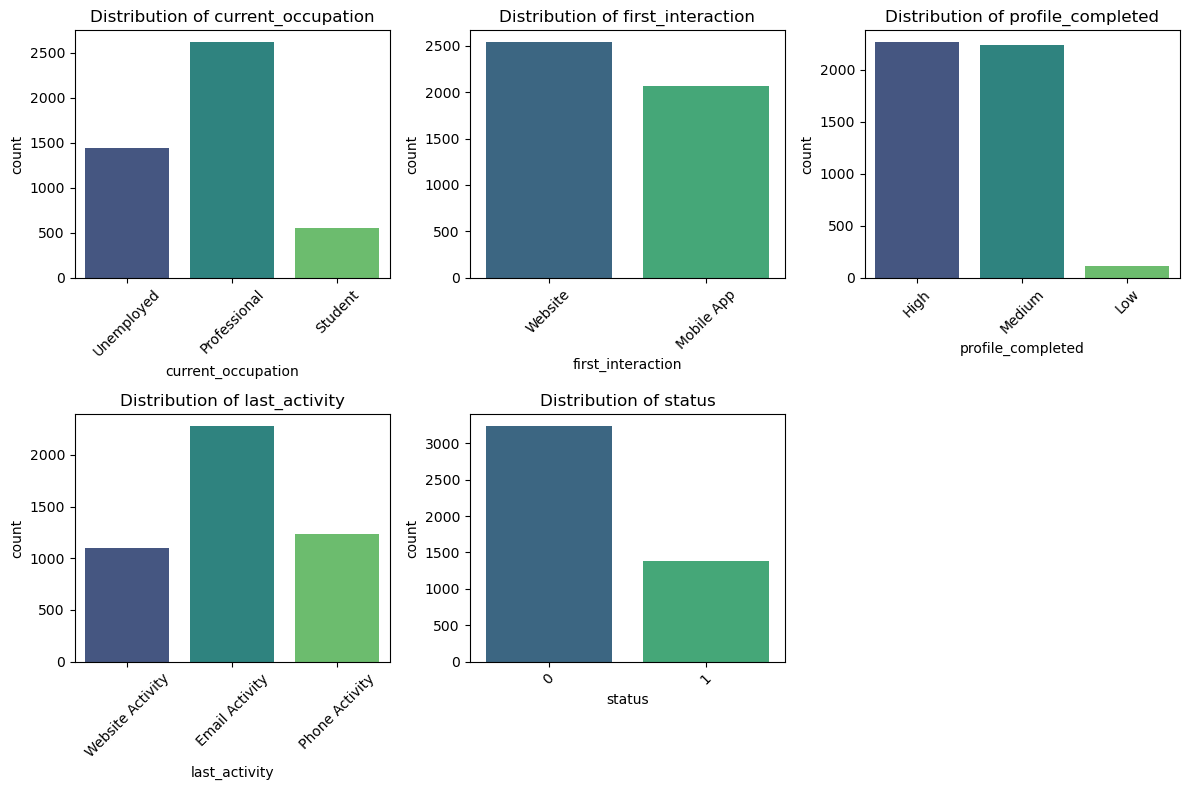

In [55]:
# Plot count plots
import seaborn as sns
plt.figure(figsize=(12, 8))
for i, col in enumerate(selected_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, hue=col, palette="viridis", legend=False)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


In [56]:
for col in selected_cols:
    print("Percentage value counts for column:",(df[col].value_counts(normalize=True) * 100).round(2).astype(str) + '%')
    print("-" * 40)


Percentage value counts for column: current_occupation
Professional    56.72%
Unemployed      31.24%
Student         12.03%
Name: proportion, dtype: object
----------------------------------------
Percentage value counts for column: first_interaction
Website       55.12%
Mobile App    44.88%
Name: proportion, dtype: object
----------------------------------------
Percentage value counts for column: profile_completed
High      49.09%
Medium    48.59%
Low        2.32%
Name: proportion, dtype: object
----------------------------------------
Percentage value counts for column: last_activity
Email Activity      49.39%
Phone Activity      26.76%
Website Activity    23.85%
Name: proportion, dtype: object
----------------------------------------
Percentage value counts for column: status
0    70.14%
1    29.86%
Name: proportion, dtype: object
----------------------------------------


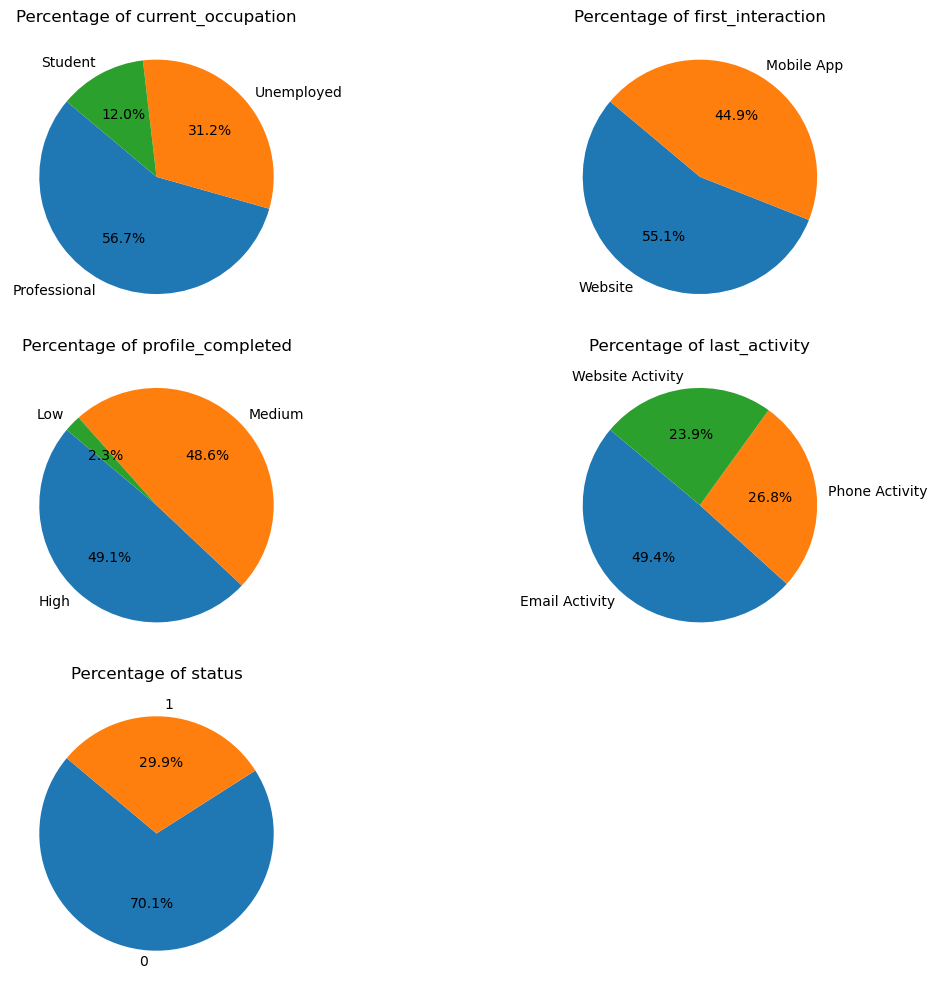

In [57]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(selected_cols, 1):
    plt.subplot(3, 2, i)
    data = df[col].value_counts(normalize=True) * 100
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"Percentage of {col}", fontsize=12)

# Hide the empty subplot if the number of selected_cols is less than 6
#if len(selected_cols) < 6:
    #plt.subplot(3, 2, len(selected_cols) + 1).axis("off")

plt.tight_layout()
plt.show()


age
Skew : -0.72
website_visits
Skew : 2.16
time_spent_on_website
Skew : 0.95
page_views_per_visit
Skew : 1.27


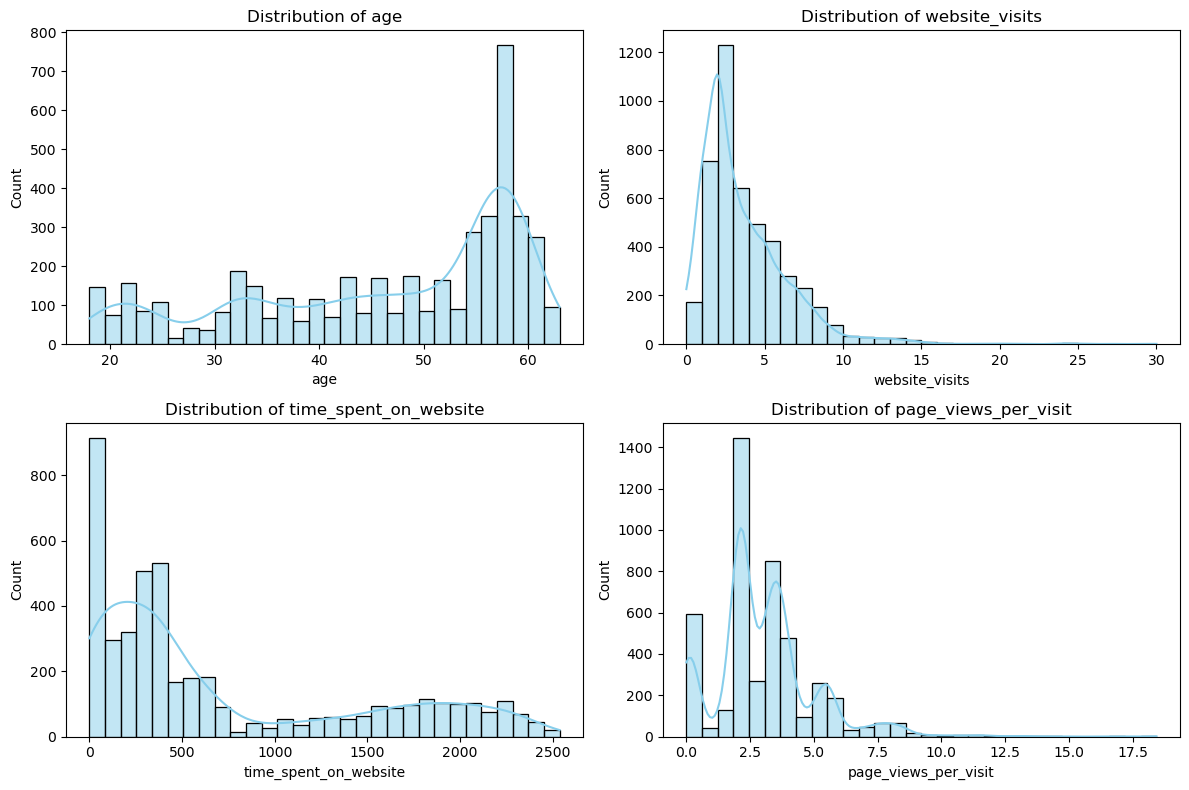

In [58]:
num_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    print(col)
    print('Skew :',round(df[col].skew(), 2))
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color="skyblue", edgecolor="black")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

Observations:

 - The distribution of age is left-skewed which shows the majority of leads are 55 - 65 years old. 
 - Website visits is right-skewed which shows the majority of visits range from 0 to approximately 7 times. There are some outliers. Which means that some leads visited the website from 10 to even 30 times.
 - Time spent on the website is right-skewed which means that most of the leads spent less than 700 seconds (~12  min) on the website.
 - Page views per visit distribution was approximately normal. Most leads visited 2.5 to 3.5 pages. However, there were many outliers that visited from 7.5 to more than 17.5 pages. 
 


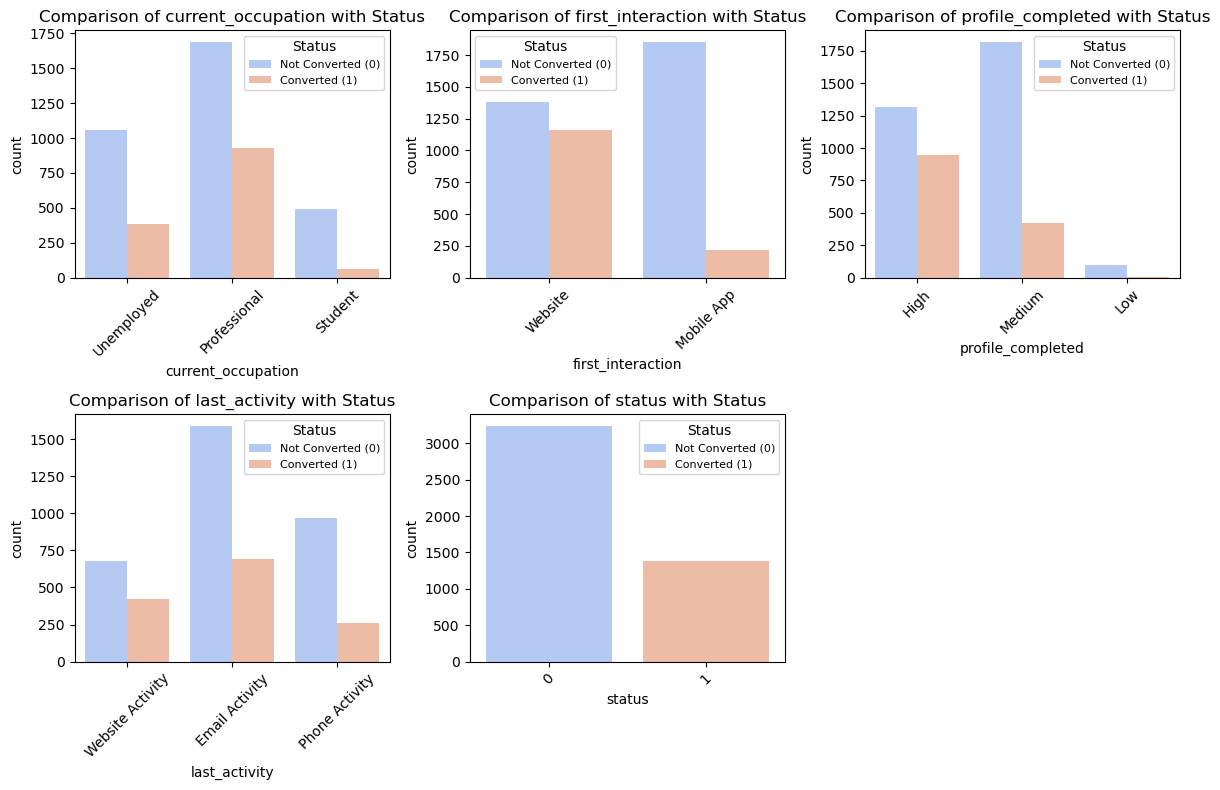

In [59]:
selected_cols = ["current_occupation", "first_interaction", "profile_completed", "last_activity", "status"]
plt.figure(figsize=(12, 8))
for i,col in enumerate(selected_cols,1):
    plt.subplot(2,3,i)
    sns.countplot(data=df, x=col, hue="status", palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title(f"Comparison of {col} with Status")
    plt.legend(title="Status", labels=["Not Converted (0)", "Converted (1)"],fontsize=8, title_fontsize=10)

plt.tight_layout()
plt.show()


In [60]:
cat_cols = ["current_occupation", "first_interaction", "profile_completed", "last_activity"]
for col in cat_cols:
    print(f"\nCounts for {col} by Status:")
    print(df.groupby(col)["status"].value_counts().unstack())
    print("-" * 50)



Counts for current_occupation by Status:
status                 0    1
current_occupation           
Professional        1687  929
Student              490   65
Unemployed          1058  383
--------------------------------------------------

Counts for first_interaction by Status:
status                0     1
first_interaction            
Mobile App         1852   218
Website            1383  1159
--------------------------------------------------

Counts for profile_completed by Status:
status                0    1
profile_completed           
High               1318  946
Low                  99    8
Medium             1818  423
--------------------------------------------------

Counts for last_activity by Status:
status               0    1
last_activity              
Email Activity    1587  691
Phone Activity     971  263
Website Activity   677  423
--------------------------------------------------


In [61]:
cat_cols = ["current_occupation", "first_interaction", "profile_completed", "last_activity"]
for col in cat_cols:
    print(f"\nCounts for {col} by Status:")
    print((df.groupby(col)["status"].value_counts(normalize=True).unstack()*100).round(2).astype(str)+"%")
    print("-" * 50)



Counts for current_occupation by Status:
status                   0       1
current_occupation                
Professional        64.49%  35.51%
Student             88.29%  11.71%
Unemployed          73.42%  26.58%
--------------------------------------------------

Counts for first_interaction by Status:
status                  0       1
first_interaction                
Mobile App         89.47%  10.53%
Website            54.41%  45.59%
--------------------------------------------------

Counts for profile_completed by Status:
status                  0       1
profile_completed                
High               58.22%  41.78%
Low                92.52%   7.48%
Medium             81.12%  18.88%
--------------------------------------------------

Counts for last_activity by Status:
status                 0       1
last_activity                   
Email Activity    69.67%  30.33%
Phone Activity    78.69%  21.31%
Website Activity  61.55%  38.45%
----------------------------------------

--------------------------------
## **Observations** 
-------------------------------

**Current Occupation vs. Status:**

* Professionals have a higher conversion rate (929 out of 2,616), while Unemployed leads also show significant conversions (383 out of 1,441).
* Students have the lowest conversion rate (65 out of 555), indicating that they are less likely to convert to paid customers.

**First Interaction vs. Status:**

* Website interactions have a higher conversion rate (1,159 out of 2,542) compared to Mobile App interactions (218 out of 2,070).
* This suggests that leads acquired through the website are more likely to convert.

**Profile Completion vs. Status:**

* Leads with High profile completion (75-100%) have a significantly higher conversion rate (946 out of 2,264).
* Medium (50-75%) profile completion shows moderate conversions (423 out of 2,241), while Low (0-50%) profile completion has minimal conversions (8 out of 107).
* This indicates that higher profile completion positively impacts lead conversion.

**Last Activity vs. Status:**

* Email Activity has the highest number of conversions (691 out of 2,278), indicating its effectiveness as a lead engagement strategy.
* Website Activity shows moderate conversion (423 out of 1,100), while Phone Activity has relatively lower conversion (263 out of 1,234).

**Insights:**

* Professionals interacting through the website with high profile completion are more likely to convert.
* Email interactions are the most effective in terms of conversion compared to phone and website activities.

In [62]:
for col in cat_cols:
    print(f"\nPercentage Distribution of {col} among Converted Leads (Status = 1):")
    # Filter only status = 1
    converted_df = df[df["status"] == 1]
    # Calculate percentage distribution within status = 1
    category_percentage = (converted_df[col].value_counts(normalize=True) * 100).round(2)
    # Display results
    print(category_percentage.astype(str) + "%")
    print("-" * 50)



Percentage Distribution of current_occupation among Converted Leads (Status = 1):
current_occupation
Professional    67.47%
Unemployed      27.81%
Student          4.72%
Name: proportion, dtype: object
--------------------------------------------------

Percentage Distribution of first_interaction among Converted Leads (Status = 1):
first_interaction
Website       84.17%
Mobile App    15.83%
Name: proportion, dtype: object
--------------------------------------------------

Percentage Distribution of profile_completed among Converted Leads (Status = 1):
profile_completed
High       68.7%
Medium    30.72%
Low        0.58%
Name: proportion, dtype: object
--------------------------------------------------

Percentage Distribution of last_activity among Converted Leads (Status = 1):
last_activity
Email Activity      50.18%
Website Activity    30.72%
Phone Activity       19.1%
Name: proportion, dtype: object
--------------------------------------------------


In [63]:
df.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0


**Observations:**

* The range of age for students is 18 to 25 years.
* The range of age for professionals is 25 to 60 years.
* The range of age for unemployed leads is 32 to 63 years.
* The average age of working professionals and unemployed leads is almost 50 years.

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 504.6+ 

In [65]:
# Creating dummy variables, drop_first=True is used to avoid redundant variables
X = pd.get_dummies(df, drop_first = False)

In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              4612 non-null   int64  
 1   website_visits                   4612 non-null   int64  
 2   time_spent_on_website            4612 non-null   int64  
 3   page_views_per_visit             4612 non-null   float64
 4   status                           4612 non-null   int64  
 5   current_occupation_Professional  4612 non-null   bool   
 6   current_occupation_Student       4612 non-null   bool   
 7   current_occupation_Unemployed    4612 non-null   bool   
 8   first_interaction_Mobile App     4612 non-null   bool   
 9   first_interaction_Website        4612 non-null   bool   
 10  profile_completed_High           4612 non-null   bool   
 11  profile_completed_Low            4612 non-null   bool   
 12  profile_completed_Me

In [67]:
X.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Professional,current_occupation_Student,current_occupation_Unemployed,first_interaction_Mobile App,first_interaction_Website,...,print_media_type1_No,print_media_type1_Yes,print_media_type2_No,print_media_type2_Yes,digital_media_No,digital_media_Yes,educational_channels_No,educational_channels_Yes,referral_No,referral_Yes
0,57,7,1639,1.861,1,False,False,True,False,True,...,False,True,True,False,False,True,True,False,True,False
1,56,2,83,0.320,0,True,False,False,True,False,...,True,False,True,False,True,False,False,True,True,False
2,52,3,330,0.074,0,True,False,False,False,True,...,True,False,True,False,False,True,True,False,True,False
3,53,4,464,2.057,1,False,False,True,False,True,...,True,False,True,False,True,False,True,False,True,False
4,23,4,600,16.914,0,False,True,False,False,True,...,True,False,True,False,True,False,True,False,True,False


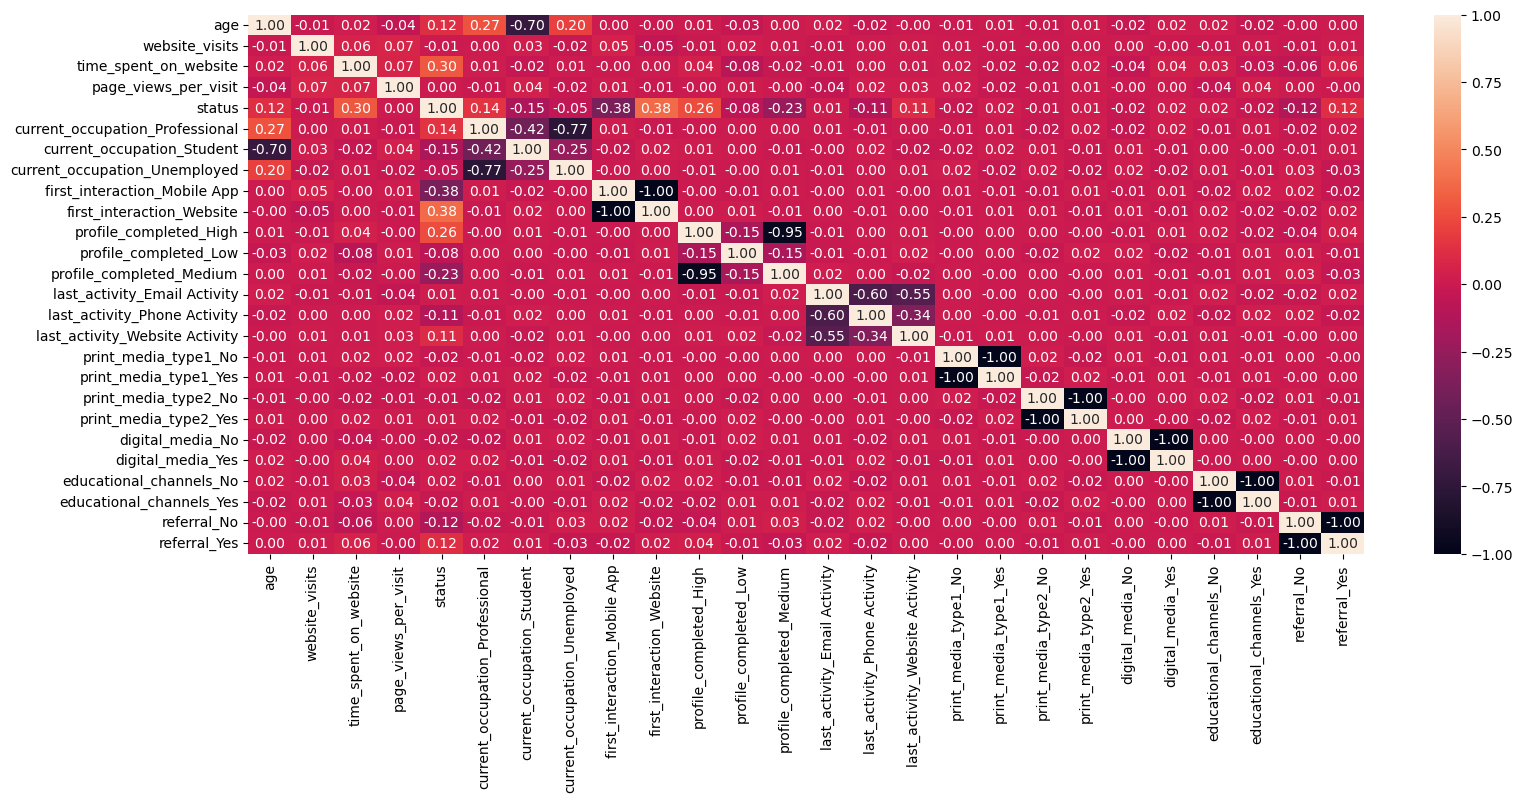

In [70]:
plt.figure(figsize = (18, 7))

sns.heatmap(X.corr(), annot = True, fmt = '.2f')

plt.show()

In [71]:
X.corr()

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Professional,current_occupation_Student,current_occupation_Unemployed,first_interaction_Mobile App,first_interaction_Website,...,print_media_type1_No,print_media_type1_Yes,print_media_type2_No,print_media_type2_Yes,digital_media_No,digital_media_Yes,educational_channels_No,educational_channels_Yes,referral_No,referral_Yes
age,1.000000,-0.011975,0.018885,-0.040675,0.122084,0.273701,-0.704235,0.201771,0.001374,-0.001374,...,-0.006642,0.006642,-0.009187,0.009187,-0.019885,0.019885,0.016751,-0.016751,-0.000151,0.000151
website_visits,-0.011975,1.000000,0.062300,0.074094,-0.006609,0.001284,0.030257,-0.022612,0.049739,-0.049739,...,0.007586,-0.007586,-0.002779,0.002779,0.000649,-0.000649,-0.005627,0.005627,-0.008882,0.008882
time_spent_on_website,0.018885,0.062300,1.000000,0.068130,0.302100,0.010439,-0.024047,0.005722,-0.004717,0.004717,...,0.015280,-0.015280,-0.023208,0.023208,-0.038771,0.038771,0.034432,-0.034432,-0.058408,0.058408
page_views_per_visit,-0.040675,0.074094,0.068130,1.000000,0.000307,-0.010317,0.044151,-0.019964,0.008911,-0.008911,...,0.018822,-0.018822,-0.011795,0.011795,-0.002695,0.002695,-0.035356,0.035356,0.002878,-0.002878
status,0.122084,-0.006609,0.302100,0.000307,1.000000,0.141476,-0.146653,-0.048289,-0.381077,0.381077,...,-0.016214,0.016214,-0.011754,0.011754,-0.015867,0.015867,0.017763,-0.017763,-0.118761,0.118761
current_occupation_Professional,0.273701,0.001284,0.010439,-0.010317,0.141476,1.000000,-0.423431,-0.771743,0.014837,-0.014837,...,-0.005777,0.005777,-0.021657,0.021657,-0.023491,0.023491,-0.014730,0.014730,-0.019455,0.019455
current_occupation_Student,-0.704235,0.030257,-0.024047,0.044151,-0.146653,-0.423431,1.000000,-0.249332,-0.016213,0.016213,...,-0.015457,0.015457,0.009247,-0.009247,0.011350,-0.011350,0.001553,-0.001553,-0.008574,0.008574
current_occupation_Unemployed,0.201771,-0.022612,0.005722,-0.019964,-0.048289,-0.771743,-0.249332,1.000000,-0.004480,0.004480,...,0.017026,-0.017026,0.016660,-0.016660,0.017144,-0.017144,0.014657,-0.014657,0.026816,-0.026816
first_interaction_Mobile App,0.001374,0.049739,-0.004717,0.008911,-0.381077,0.014837,-0.016213,-0.004480,1.000000,-1.000000,...,0.007125,-0.007125,-0.010794,0.010794,-0.008862,0.008862,-0.021292,0.021292,0.024008,-0.024008
first_interaction_Website,-0.001374,-0.049739,0.004717,-0.008911,0.381077,-0.014837,0.016213,0.004480,-1.000000,1.000000,...,-0.007125,0.007125,0.010794,-0.010794,0.008862,-0.008862,0.021292,-0.021292,-0.024008,0.024008


In [72]:
X.to_csv('Leads_cleaned_data.csv', index=False)